# Assignment group 3: Probabilistic modeling and prediction

#### Kiana Montazeri

## Module C _(51 pts)_ Exploring Probabilistic Models of Discrete Data
Here, we'll be working with some data from the Indego bikeshare company:

- `./data/indego-trips-2017-q3.csv`

Our goal is to look at a particular numeric aspect:

- how often bikes get used (and worn out).

The entire data set takes place over a quarter of 2017. So all of the bikes are represented according to the same quantity of time, right? Well, if so and if each gets rented randomly at a fixed rate, $\lambda$, then the distribution of bike usage probabilities:

$$P(\text{a bike gets rented }\:x\:\text{ times in a quarter})$$

will be a Poisson distribution! Let's investigate to see if we can support this possibility.

In [1]:
#Libraries in use:
from pprint import pprint
from collections import Counter
from collections import defaultdict
import re
import csv
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as  pd
import numpy as np

__C1.__ _(2 pts_) To get started, import pandas and load the data as usual. Print the spreadsheet's head so that the data's structure is close at hand.

In [2]:
bike_data = pd.read_csv("./data/indego-trips-2017-q3.csv", parse_dates = [0])
bike_data.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
0,144361832,12,2017-07-01 00:04:00,2017-07-01 00:16:00,3160,39.956619,-75.198624,3163,39.949741,-75.180969,11883,30,One Way,Indego30
1,144361829,31,2017-07-01 00:06:00,2017-07-01 00:37:00,3046,39.950119,-75.144722,3101,39.942951,-75.159554,5394,0,One Way,Walk-up
2,144361830,15,2017-07-01 00:06:00,2017-07-01 00:21:00,3006,39.952202,-75.203110,3101,39.942951,-75.159554,3331,30,One Way,Indego30
3,144361831,15,2017-07-01 00:06:00,2017-07-01 00:21:00,3006,39.952202,-75.203110,3101,39.942951,-75.159554,3515,30,One Way,Indego30
4,144361828,30,2017-07-01 00:07:00,2017-07-01 00:37:00,3046,39.950119,-75.144722,3101,39.942951,-75.159554,11913,0,One Way,Walk-up


In [3]:
bike_data.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type'],
      dtype='object')

__C2.__ _(5 pts)_ Now, let's start things out by counting the number of trips that each bike has in total, using pandas `df.groupby()` to group the trips, and a counter, `NumBikes`, to store the number of bikes, $n$, rented $x$ times in the quarter, $n(x)$.

In [4]:
bike_info_list = [x for x in bike_data.groupby(['bike_id'])]
n_x = Counter()
for i in range(len(bike_info_list)):
    n_x[len(list(bike_info_list[i][1]['trip_id']))] += 1

In [5]:
print(n_x)

Counter({245: 16, 220: 14, 226: 13, 225: 13, 236: 13, 247: 13, 252: 12, 257: 12, 210: 12, 242: 12, 241: 12, 203: 11, 250: 11, 201: 11, 218: 11, 224: 11, 258: 11, 243: 11, 209: 11, 227: 10, 204: 10, 219: 10, 270: 10, 235: 10, 282: 10, 237: 10, 285: 10, 239: 9, 205: 9, 261: 9, 268: 9, 263: 9, 260: 9, 253: 8, 217: 8, 273: 8, 200: 8, 192: 8, 207: 8, 229: 8, 213: 8, 234: 8, 269: 8, 249: 8, 255: 8, 267: 8, 287: 8, 301: 8, 230: 7, 228: 7, 212: 7, 199: 7, 214: 7, 179: 7, 244: 7, 223: 7, 189: 7, 183: 7, 202: 7, 248: 7, 310: 7, 231: 6, 306: 6, 215: 6, 221: 6, 240: 6, 157: 6, 259: 6, 309: 6, 238: 6, 233: 6, 246: 6, 143: 6, 198: 6, 222: 6, 265: 6, 188: 6, 277: 6, 196: 6, 284: 6, 289: 6, 314: 6, 300: 6, 326: 6, 193: 5, 294: 5, 232: 5, 313: 5, 176: 5, 197: 5, 278: 5, 148: 5, 281: 5, 191: 5, 274: 5, 206: 5, 211: 5, 216: 5, 272: 5, 254: 5, 113: 5, 291: 5, 299: 5, 283: 5, 161: 4, 174: 4, 186: 4, 181: 4, 180: 4, 296: 4, 354: 4, 256: 4, 175: 4, 166: 4, 262: 4, 182: 4, 155: 4, 172: 4, 275: 4, 264: 4, 286:

__C3.__ _(5 pts)_ Now that we've got our bikes counted up, let's compute the empirical probabilities:

$$P(x) = P(\text{a bike is rented }\:x\:\text{ times in a quarter}) = 
\frac{n(x)}{\sum n(x)}.$$

We already have $n(x)$ in our `Counter()` from __C2__, so let's start by turning its keys and values into numpy arrays (vectors), `n`, and `x`. After this is done, we can make the probabilities, `p`,  from a scalar product of `n`: divide it by its sum.

In [6]:
n = np.array([t for t in n_x.values()])
x = np.array([t for t in n_x.keys()])

In [7]:
p = n/sum(n)

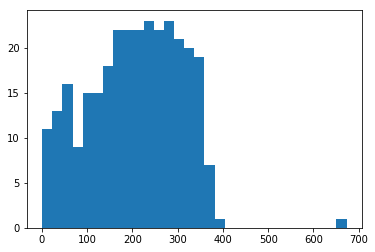

In [8]:
_= plt.hist(x, bins = 30)

__C4.__ _(2 pts)_ Now it's time to find the average number of times a bike gets rented in a quarter. We'll call this quantity $\lambda$. So far, we've talked about averages of data, e.g., the arithmetic mean of $x$:

$$\overline{x} = \frac{1}{n}\sum_{i=1}^n x_i$$

But what we're now interested in is the average&mdash;center&mdash;of our probability distribution, $P(x)$. This quantity has a special name: the _expectation of $x$_, which is computed as:

$$E[x] = \sum_{i=1}^nxP(x)$$

This is actually a generalization of arithmetic mean above, if you view the arithmetic mean as utilizing a _uniform_ probability distribution, having equal probability ($1/n$) for each value, $x_i$. Here's the nice part for us: looking at the equation for $E[x]$, we simply have an inner product between $P(x)$ and $x$. So let's compute $\overline{x} = E[x]$ using the numpy dot product as an easy trick!

In [9]:
expect_x = p.dot(x)

In [10]:
expect_x

226.50163666121114

__C5.__ _(2 pts)_ Now let's use $\overline{x}$ to sample a poisson distribution. We sample as many points as there are unique bikes, using `numpy.random.poisson(rate, size = nbikes)` function for this.

In [11]:
poisson = np.random.poisson(expect_x , size = len(bike_data['bike_id'].unique()))

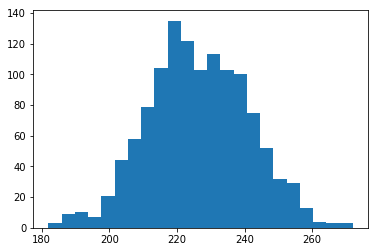

In [12]:
_= plt.hist(poisson, bins = "auto")

In [13]:
poisson

array([253, 234, 207, ..., 236, 221, 228])

__C6.__ _(3 pts)_ Now we've got our poisson sample, let's compute the analagous values to __Sec. C2__ for the sample and build a `Counter()` with the the number of sample-bikes, `s_n`, that were used $x$ times in the quarter.

In [14]:
s_n = Counter()
for o in poisson:
    s_n[o] += 1

In [15]:
print(s_n)

Counter({219: 38, 228: 37, 218: 36, 224: 36, 214: 35, 221: 34, 226: 33, 227: 33, 230: 32, 223: 31, 225: 30, 229: 30, 231: 30, 235: 29, 220: 27, 237: 27, 217: 27, 234: 26, 238: 26, 213: 26, 239: 26, 222: 25, 236: 25, 241: 24, 233: 23, 243: 22, 215: 21, 211: 21, 216: 21, 232: 21, 240: 21, 212: 18, 209: 18, 242: 16, 206: 15, 205: 15, 248: 15, 253: 14, 210: 14, 245: 14, 246: 13, 244: 13, 208: 13, 207: 12, 204: 12, 203: 12, 247: 10, 251: 9, 250: 8, 249: 8, 200: 7, 252: 7, 198: 6, 254: 6, 256: 5, 199: 5, 202: 5, 257: 5, 255: 4, 191: 4, 193: 4, 260: 3, 201: 3, 258: 3, 187: 3, 262: 2, 259: 2, 196: 2, 190: 2, 270: 2, 265: 2, 197: 2, 189: 2, 188: 2, 261: 2, 194: 2, 186: 2, 184: 1, 185: 1, 267: 1, 182: 1, 272: 1, 195: 1})


__C7.__ _(2 pts)_ With the sample counted up, put the values and keys in numpy arrays, and then find the sample probabilities, just like we did in __C3__.

In [16]:
sample_n = np.array([t for t in s_n.values()])
sample_x = np.array([t for t in s_n.keys()])
sample_p = sample_n/sum(sample_n)

__C8.__ _(5 pts)_ Now it's time to plot _bar plots_ of both your sample and the data. Note: we're using bar plots, since our data are _discrete_ and not in need of binning! The edges of our bars will be given by the $n$ values and the heights will be given by the $p$ values.

What do you notice? Do the two line up well? If not, what poisson-distribution assumptions might not have been met?

<font color=blue>It seems like that our hypothesis is not completely accurate or we did not consider all the factors in bike rentals that are available to explain this data. For example in poisson distribution the probability of one bike being rented a specific number of times in a certain time interval is fixed if these rentals occur with a constant rate and independent of the time of the previous rental which may not be fixed for all the bikes regardless of the location or other factors for that specific bike.</font>

In [17]:
def bar_plot(whichdata, color, x, p):
    _  = plt.bar(x = x, height = p, tick_label = x, 
            color=color, alpha=0.4, width=0.75)

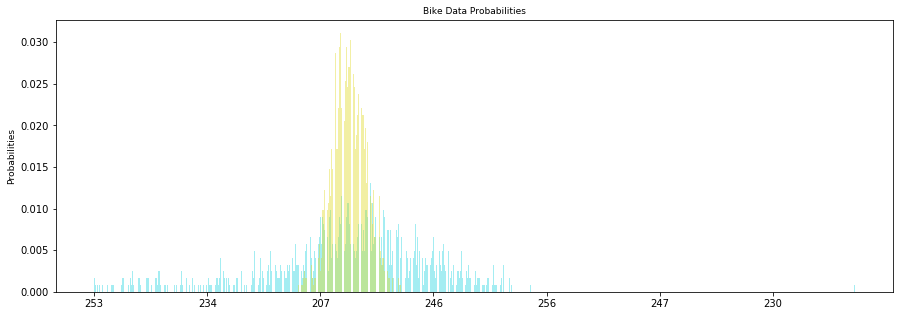

In [18]:
bar_fig = plt.figure(figsize = (15, 5))
bar_plot("Original Data", '#1CD3DF', x, p)
bar_plot("Sample Data","#DFD91C", sample_x, sample_p)
_ = plt.tick_params("number of times a bike is rented") 
## Set the title
_ = plt.title("Bike Data Probabilities", fontsize = 9)
## Set the y-label
_ = plt.ylabel("Probabilities", fontsize = 9)
_ = plt.xticks(np.arange(min(x), max(x)+1, 100.0))

__C9.__ (3 pts)Okay, so there's probably a few things that went wrong:

- Did all bikes get used for the _same_ amount of time, i.e., were some brought in/out of commission?
- Do some bikes just happen to exist in higher-traffic areas?
- Do some times of year turn out a greater number of bikes?

It's not the _easiest_ thing in the world to overcome these issues. However, perhaps a slightly different quantity does:

- The number of times a given bike gets used in one day.

Does this quantity better meet the criteria above, and if so, why?

<font color=blue>Yes, because maybe the bike is located ina more crowded part of the city or in a less crowded part. It gives us an idea of what would be the probability of that bike being picked up as an underlying reason based on other factor other than the randomness of a bike being rented.</font>

- Question: Does the quantity suffer from comparing bikes with different wear and tear?
    - <font color=blue>The bike with more probability of getting picked up in one day is more likely used and probably damaged.</font>
- Question: Does the quantity still suffer from dependence on environmental variation?   
    - <font color=blue>Bikes in crowded places will be picked up more per day than less crowded places.</font>
- Question: How does this quantity deal with seasonal variation differences, if at all?
    - <font color=blue>With cold wether all the bikes are rented less frequently per day but the decrease in rentals maybe more significant in crowded places.</font>

__C10.__ _(2 pts)_ Poisson for an _individual_ bike's daily rental rate? For this, we'll need to be able to count the number of times a given bike is rented each day. But first, we have to restrict to just the bike of interest. I choose `bike_id = 3331`. Create a boolean mask and filter the rows for this bike. When you're done, print out the head of the resulting 'start_time' column.

In [20]:
Bike_3331 = bike_data[bike_data['bike_id'] == 3331]

In [22]:
Bike_3331[['start_time']].head()

,start_time
2,2017-07-01 00:06:00
1128,2017-07-01 15:01:00
2579,2017-07-02 11:38:00
2969,2017-07-02 13:29:00
3486,2017-07-02 16:03:00


__C11.__ _(5 pts)_ What I want to know is if the number of times this particular bike is rented in a given day follows a Poisson distribution.  So, we'll have to count up the bikes usage _by day_. We'll want to ignore the timestamp portion and just keep the first ten characters of the date string. While we could do some datetime parsing and high-level work to make this happen, a quick and dirty way simply slices out the first ten characters of the dates as unique strings of the form:

- `yyyy-mm-dd`

simply by 

- `DateStr = DateTimeStr[0:10]`

With these, we can count up our bike's trips in a `Counter()` called `NumTripsPerDay`. We'll then go on to use this to build more $x$ and $P(x)$ values, but just for this bike.

In [25]:
Bike_3331 = Bike_3331[Bike_3331['StartDate'].notnull()].copy() #to avoid settingwithcopywarning of pandas :D
Bike_3331.loc[:, 'StartDate'] = Bike_3331['start_time'].str[0:10]

In [26]:
Bike_3331.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,StartDate
2,144361830,15,2017-07-01 00:06:00,2017-07-01 00:21:00,3006,39.952202,-75.203110,3101,39.942951,-75.159554,3331,30,One Way,Indego30,2017-07-01
1128,144701410,25,2017-07-01 15:01:00,2017-07-01 15:26:00,3055,39.951118,-75.154572,3061,39.954250,-75.177612,3331,30,One Way,Indego30,2017-07-01
2579,145177279,50,2017-07-02 11:38:00,2017-07-02 12:28:00,3061,39.954250,-75.177612,3057,39.964581,-75.180031,3331,0,One Way,Walk-up,2017-07-02
2969,145245783,148,2017-07-02 13:29:00,2017-07-02 15:57:00,3057,39.964581,-75.180031,3057,39.964581,-75.180031,3331,0,Round Trip,Walk-up,2017-07-02
3486,145268679,10,2017-07-02 16:03:00,2017-07-02 16:13:00,3057,39.964581,-75.180031,3032,39.945271,-75.179710,3331,30,One Way,Indego30,2017-07-02


In [27]:
NumTripsPerDay = Counter(Bike_3331.StartDate)

In [28]:
pprint(NumTripsPerDay)

Counter({'2017-08-26': 9,
         '2017-08-24': 7,
         '2017-07-02': 6,
         '2017-07-11': 6,
         '2017-07-29': 6,
         '2017-08-08': 6,
         '2017-08-17': 6,
         '2017-08-25': 6,
         '2017-09-27': 6,
         '2017-07-06': 5,
         '2017-07-07': 5,
         '2017-07-08': 5,
         '2017-08-02': 5,
         '2017-09-14': 5,
         '2017-09-23': 5,
         '2017-07-10': 4,
         '2017-07-13': 4,
         '2017-07-15': 4,
         '2017-07-25': 4,
         '2017-07-26': 4,
         '2017-07-28': 4,
         '2017-08-01': 4,
         '2017-08-19': 4,
         '2017-08-27': 4,
         '2017-09-04': 4,
         '2017-09-11': 4,
         '2017-09-12': 4,
         '2017-09-28': 4,
         '2017-07-05': 3,
         '2017-07-09': 3,
         '2017-07-12': 3,
         '2017-07-16': 3,
         '2017-07-17': 3,
         '2017-07-24': 3,
         '2017-08-05': 3,
         '2017-08-18': 3,
         '2017-08-21': 3,
         '2017-09-02': 3,
         '20

__C12.__ _(2 pts)_ Now that we have the bike's trips grouped by date, let's compute a `Counter()`, `NumDays`, that now stores the number of days, $n$, in which our bike was rented $x$ times: $n(x)$, as in __C2__.

In [29]:
NumDays = Counter()
for x in list(NumTripsPerDay.values()):
    NumDays[x] += 1

In [30]:
print(NumDays)

Counter({3: 15, 2: 14, 4: 13, 1: 12, 6: 7, 5: 6, 7: 1, 9: 1})


__C13.__ _(3 pts)_ Now that we've revised our frequency data, let go on an compute our vector forms of $n$, $x$,  and $P(x)$, and then the expectation, $E[x] = \overline{x}$, as in __C2&ndash;C4__.

In [31]:
n_revised = np.array([t for t in NumDays.values()])
x_revised = np.array([t for t in NumDays.keys()])

In [32]:
p_revised = n_revised/sum(n_revised)

In [33]:
expect_x_revised = p_revised.dot(x_revised)

In [34]:
p_revised

array([0.20289855, 0.10144928, 0.17391304, 0.2173913 , 0.08695652,
       0.1884058 , 0.01449275, 0.01449275])

In [35]:
expect_x_revised

3.2608695652173916

__C14.__ _(6 pts)_ We can now draw a Poisson sample again, but for the trips-per-day data and average. Additionally, continue through the steps in __C5&ndash;C7__ to make a the sample data's probabilities.

In [36]:
poisson_revised = np.random.poisson(expect_x_revised , size = len(Bike_3331['StartDate'].unique()))

In [37]:
s_n_revised = Counter()
for oo in poisson_revised:
    s_n_revised[oo] += 1

In [38]:
sample_n_revised = np.array([tt for tt in s_n_revised.values()])
sample_x_revised = np.array([tt for tt in s_n_revised.keys()])
sample_p_revised = sample_n_revised/sum(sample_n_revised)

__C15.__ _(4 pts)_ Plot the two bar plots again. How well do they line up? Do these data appear to be more Poisson? If so, why do you think?

<font color=blue>Yes, very much so. It seems like now our hypothesis is very well adjusted to the real data. In this case we are modeling each bike seperatly with all the factors specific to that particular bike which counts for the location, wear and tear, number of rentals and etc.</font>

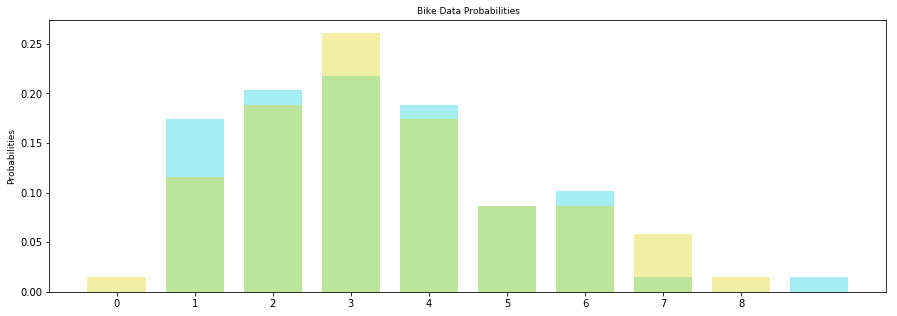

In [40]:
bar_fig = plt.figure(figsize = (15, 5))
bar_plot("Original Data", '#1CD3DF', x_revised, p_revised)
bar_plot("Sample Data","#DFD91C", sample_x_revised, sample_p_revised)
_ = plt.tick_params("number of times a bike is rented") 
## Set the title
_ = plt.title("Bike Data Probabilities", fontsize = 9)
## Set the y-label
_ = plt.ylabel("Probabilities", fontsize = 9)